# Calculate Posteriors For Means For Patients With And Without CHD

Created: 2023-09-09 by Tom Lever

Updated: 2023-09-09 by Tom Lever

The data set `CHDdata.csv` contains cases of coronary heart disease (CHD) and variables associated with the patient's condition: systolic blood pressure (`sbp`, $mm \ Hg$), yearly tobacco use (`tobacco`, $kg$), low-density lipoprotein (`ldl`), adiposity (`adiposity`), famly history of CHD (`famhist`, 0 or 1), type-A personality score (`typea`), obesity (`obesity`), alcohol use (`alcohol`), age (`age`, $years$), and the diagnosis of CHD (`chd`, 0 or 1).

Perform a Bayesian analysis of these data that finds the posterior marginal probability distributions for the means for the data of patients with and without CHD. You should first standardize (i.e., subtract the mean from and divide by the standard deviation) all the numeric variables (remove family history and do not scale CHD). Then separate the data into two sets, one for patients with CHD and one for patients without CHD.

Your priors for both groups should assume means of $0$ for all variables and a correlation of $0$ between all pairs of variables. You should assume all variables for the variables are $1$. Use a prior $alpha$ equal to $1$ plus the number of predictor variables. Compute and compare the Bayesian estimates for the posterior means for each group.

For $5$ extra credit points, compute the probability of observing a point at least as extreme as the posterior mean of patients without CHD under the posterior distribution for the patients with CHD. Then compute the probability of observing a point at least as extreme as the posterior mean of patients with CHD under the posterior distribution for the patients without CHD.

In [1]:
import pandas as pd
data_frame_of_patient_characteristics_and_indicators_of_CHD = pd.read_csv('CHDdata.csv')
data_frame_of_patient_characteristics_and_indicators_of_CHD.describe()

,sbp,tobacco,ldl,adiposity,typea,obesity,alcohol,age,chd
count,462.000000,462.000000,462.000000,462.000000,462.000000,462.000000,462.000000,462.000000,462.000000
mean,138.326840,3.635649,4.740325,25.406732,53.103896,26.044113,17.044394,42.816017,0.346320
std,20.496317,4.593024,2.070909,7.780699,9.817534,4.213680,24.481059,14.608956,0.476313
min,101.000000,0.000000,0.980000,6.740000,13.000000,14.700000,0.000000,15.000000,0.000000
25%,124.000000,0.052500,3.282500,19.775000,47.000000,22.985000,0.510000,31.000000,0.000000
50%,134.000000,2.000000,4.340000,26.115000,53.000000,25.805000,7.510000,45.000000,0.000000
75%,148.000000,5.500000,5.790000,31.227500,60.000000,28.497500,23.892500,55.000000,1.000000
max,218.000000,31.200000,15.330000,42.490000,78.000000,46.580000,147.190000,64.000000,1.000000


In [2]:
data_frame_of_patient_characteristics_and_indicators_of_CHD = data_frame_of_patient_characteristics_and_indicators_of_CHD.drop(columns = "famhist")
data_frame_of_patient_characteristics_and_indicators_of_CHD

,sbp,tobacco,ldl,adiposity,typea,obesity,alcohol,age,chd
0,160,12.00,5.73,23.11,49,25.30,97.20,52,1
1,144,0.01,4.41,28.61,55,28.87,2.06,63,1
2,118,0.08,3.48,32.28,52,29.14,3.81,46,0
3,170,7.50,6.41,38.03,51,31.99,24.26,58,1
4,134,13.60,3.50,27.78,60,25.99,57.34,49,1
...,...,...,...,...,...,...,...,...,...
457,214,0.40,5.98,31.72,64,28.45,0.00,58,0
458,182,4.20,4.41,32.10,52,28.61,18.72,52,1
459,108,3.00,1.59,15.23,40,20.09,26.64,55,0
460,118,5.40,11.61,30.79,64,27.35,23.97,40,0


In [3]:
data_frame_of_patient_characteristics_and_indicators_of_CHD.keys()

Index(['sbp', 'tobacco', 'ldl', 'adiposity', 'typea', 'obesity', 'alcohol',
       'age', 'chd'],
      dtype='object')

In [4]:
import numpy as np
for key in data_frame_of_patient_characteristics_and_indicators_of_CHD.keys()[0:8]:
    print("Standardizing " + key)
    data_frame_of_patient_characteristics_and_indicators_of_CHD[key] = data_frame_of_patient_characteristics_and_indicators_of_CHD[key] - np.mean(data_frame_of_patient_characteristics_and_indicators_of_CHD[key])
    data_frame_of_patient_characteristics_and_indicators_of_CHD[key] = data_frame_of_patient_characteristics_and_indicators_of_CHD[key] / np.std(data_frame_of_patient_characteristics_and_indicators_of_CHD[key])

Standardizing sbp
Standardizing tobacco
Standardizing ldl
Standardizing adiposity
Standardizing typea
Standardizing obesity
Standardizing alcohol
Standardizing age


In [5]:
data_frame_of_patient_characteristics_and_indicators_of_CHD.describe()

,sbp,tobacco,ldl,adiposity,typea,obesity,alcohol,age,chd
count,4.620000e+02,4.620000e+02,4.620000e+02,4.620000e+02,4.620000e+02,4.620000e+02,4.620000e+02,4.620000e+02,462.000000
mean,-1.384174e-16,-2.210834e-17,3.421986e-16,1.807116e-16,-9.227828e-17,5.978863e-16,2.153160e-16,-9.612321e-18,0.346320
std,1.001084e+00,1.001084e+00,1.001084e+00,1.001084e+00,1.001084e+00,1.001084e+00,1.001084e+00,1.001084e+00,0.476313
min,-1.823123e+00,-7.924170e-01,-1.817753e+00,-2.401708e+00,-4.089354e+00,-2.695129e+00,-6.969825e-01,-1.906103e+00,0.000000
25%,-6.997535e-01,-7.809742e-01,-7.047170e-01,-7.245926e-01,-6.224081e-01,-7.267824e-01,-6.761275e-01,-8.096968e-01,0.000000
50%,-2.113321e-01,-3.565020e-01,-1.935182e-01,9.112757e-02,-1.059418e-02,-5.680824e-02,-3.898822e-01,1.496582e-01,0.000000
75%,4.724579e-01,4.063492e-01,5.074164e-01,7.489145e-01,7.031887e-01,5.828745e-01,2.800340e-01,8.349118e-01,1.000000
max,3.891408e+00,6.007857e+00,5.119082e+00,2.197976e+00,2.538631e+00,4.878906e+00,5.321938e+00,1.451640e+00,1.000000


In [6]:
data_frame_of_characteristics_and_indicators_of_CHD_for_patients_with_CHD = data_frame_of_patient_characteristics_and_indicators_of_CHD[data_frame_of_patient_characteristics_and_indicators_of_CHD.chd == 1]
data_frame_of_characteristics_and_indicators_of_CHD_for_patients_without_CHD = data_frame_of_patient_characteristics_and_indicators_of_CHD[data_frame_of_patient_characteristics_and_indicators_of_CHD.chd == 0]

In [7]:
data_frame_of_characteristics_and_indicators_of_CHD_for_patients_with_CHD.describe()

,sbp,tobacco,ldl,adiposity,typea,obesity,alcohol,age,chd
count,160.000000,160.000000,160.000000,160.000000,160.000000,160.000000,160.000000,160.000000,160.0
mean,0.264268,0.411771,0.361398,0.349128,0.141722,0.137517,0.085909,0.512414,1.0
std,1.156458,1.212965,1.075607,0.908099,1.044840,1.043288,1.070602,0.729735,0.0
min,-1.774281,-0.792417,-1.542213,-2.060752,-3.375571,-2.695129,-0.696983,-1.769052,1.0
25%,-0.528806,-0.465481,-0.386879,-0.250150,-0.545931,-0.572356,-0.677559,-0.004524,1.0
50%,-0.015964,0.107747,0.156949,0.385765,0.193344,0.102370,-0.356351,0.697861,1.0
75%,0.985300,0.994834,0.890513,1.052558,0.805158,0.649991,0.308250,1.109013,1.0
max,3.891408,6.007857,4.553501,2.197976,2.538631,4.674587,5.321938,1.451640,1.0


In [8]:
data_frame_of_characteristics_and_indicators_of_CHD_for_patients_without_CHD.describe()

,sbp,tobacco,ldl,adiposity,typea,obesity,alcohol,age,chd
count,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.0
mean,-0.140010,-0.218157,-0.191469,-0.184968,-0.075085,-0.072857,-0.045514,-0.271478,0.0
std,0.878424,0.787283,0.904178,1.000078,0.970504,0.971876,0.960947,1.019840,0.0
min,-1.823123,-0.792417,-1.817753,-2.401708,-4.089354,-1.970511,-0.696983,-1.906103,0.0
25%,-0.699754,-0.792417,-0.813483,-1.016013,-0.622408,-0.817657,-0.676128,-1.083798,0.0
50%,-0.309016,-0.566831,-0.367543,-0.100580,-0.061579,-0.112639,-0.449789,-0.192969,0.0
75%,0.277089,0.123004,0.264506,0.585513,0.601220,0.480121,0.219923,0.543679,0.0
max,3.696039,3.566733,5.119082,2.142651,2.436662,4.878906,5.244243,1.451640,0.0


Let's examine the difference between the distributions for parameter Systolic Blood Pressure for patients with CHD (category 1) and patients without SHD (category 0), $pdf(sdp \ | \ with \ CHD)$ and $pdf(sdp \ | \ without \ CHD)$.

C:\Users\Tom\AppData\Local\Temp\ipykernel_24248\3127534417.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(
C:\Users\Tom\AppData\Local\Temp\ipykernel_24248\3127534417.py:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(


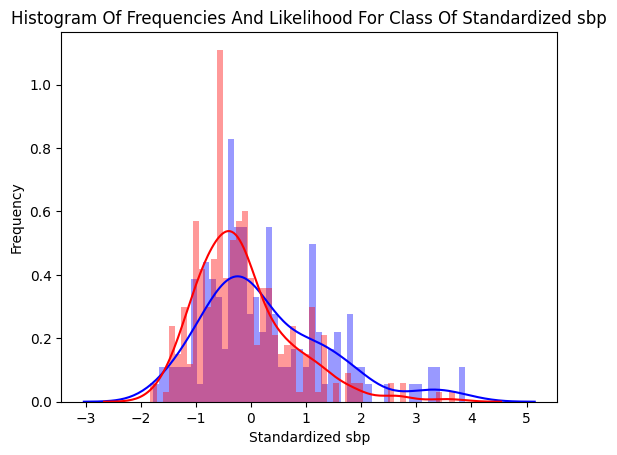

C:\Users\Tom\AppData\Local\Temp\ipykernel_24248\3127534417.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(
C:\Users\Tom\AppData\Local\Temp\ipykernel_24248\3127534417.py:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(


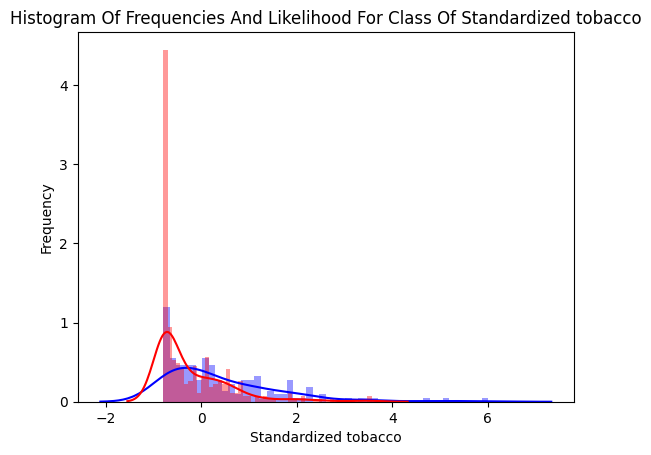

C:\Users\Tom\AppData\Local\Temp\ipykernel_24248\3127534417.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(
C:\Users\Tom\AppData\Local\Temp\ipykernel_24248\3127534417.py:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(


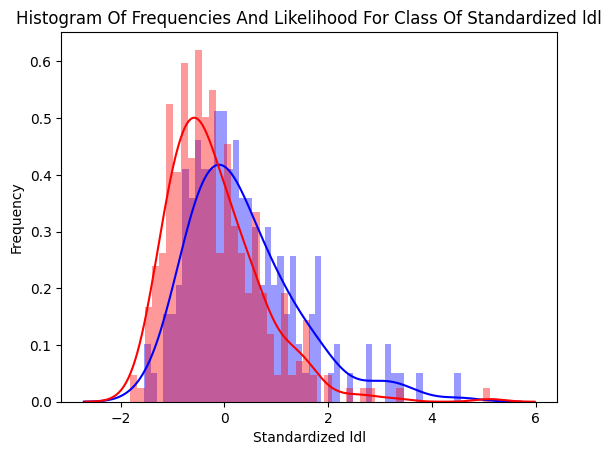

C:\Users\Tom\AppData\Local\Temp\ipykernel_24248\3127534417.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(
C:\Users\Tom\AppData\Local\Temp\ipykernel_24248\3127534417.py:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(


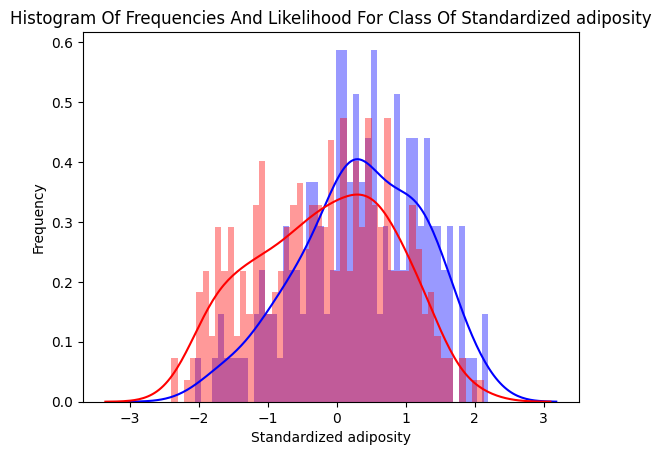

C:\Users\Tom\AppData\Local\Temp\ipykernel_24248\3127534417.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(
C:\Users\Tom\AppData\Local\Temp\ipykernel_24248\3127534417.py:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(


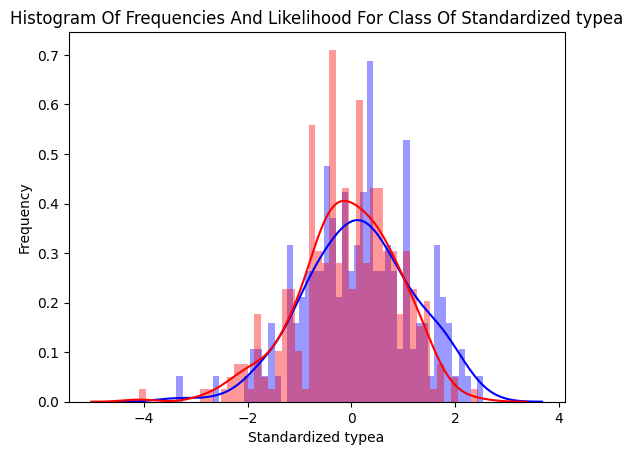

C:\Users\Tom\AppData\Local\Temp\ipykernel_24248\3127534417.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(
C:\Users\Tom\AppData\Local\Temp\ipykernel_24248\3127534417.py:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(


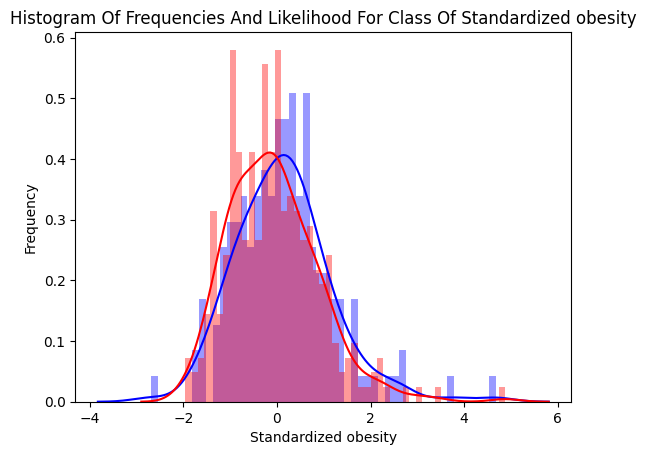

C:\Users\Tom\AppData\Local\Temp\ipykernel_24248\3127534417.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(
C:\Users\Tom\AppData\Local\Temp\ipykernel_24248\3127534417.py:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(


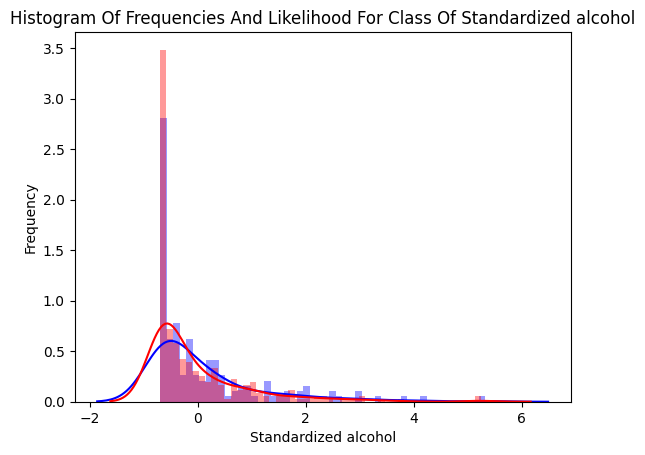

C:\Users\Tom\AppData\Local\Temp\ipykernel_24248\3127534417.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(
C:\Users\Tom\AppData\Local\Temp\ipykernel_24248\3127534417.py:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(


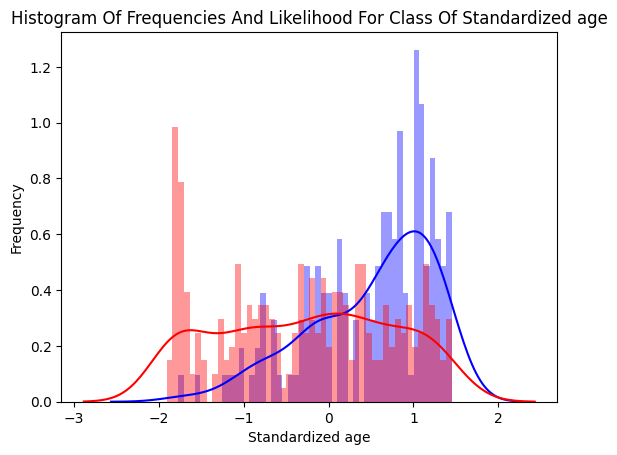

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
for key in data_frame_of_patient_characteristics_and_indicators_of_CHD.keys()[0:8]:
    sns.distplot(
        data_frame_of_characteristics_and_indicators_of_CHD_for_patients_with_CHD[key],
        bins = 50,
        color = 'blue',
        label = 'with CHD'
    )
    sns.distplot(
        data_frame_of_characteristics_and_indicators_of_CHD_for_patients_without_CHD[key],
        bins = 50,
        color = 'red',
        label = 'without CHD'
    )
    plt.xlabel('Standardized ' + key)
    plt.ylabel('Frequency')
    plt.title('Histogram Of Frequencies And Likelihood For Class Of Standardized ' + key)
    plt.show()

Let's check the mean of each class to get a first look at the separation between classes.

In [10]:
print(data_frame_of_characteristics_and_indicators_of_CHD_for_patients_with_CHD.columns)
print('Mean array $M \in R^{1 x k = 8}$ for data frame of characteristics and indicators of CHD for patients with CHD:')
mean_array_for_patients_with_CHD = np.array([data_frame_of_characteristics_and_indicators_of_CHD_for_patients_with_CHD.mean()[0:8]])
print(mean_array_for_patients_with_CHD)
print('Mean array $M \in R^{1 x k = 8}$ for data frame of characteristics and indicators of CHD for patients without CHD:')
mean_array_for_patients_without_CHD = np.array([data_frame_of_characteristics_and_indicators_of_CHD_for_patients_without_CHD.mean()[0:8]])
print(mean_array_for_patients_without_CHD)

Index(['sbp', 'tobacco', 'ldl', 'adiposity', 'typea', 'obesity', 'alcohol',
       'age', 'chd'],
      dtype='object')
Mean array $M \in R^{1 x k = 8}$ for data frame of characteristics and indicators of CHD for patients with CHD:
[[0.26426823 0.41177089 0.36139839 0.34912802 0.14172199 0.13751694
  0.0859086  0.51241433]]
Mean array $M \in R^{1 x k = 8}$ for data frame of characteristics and indicators of CHD for patients without CHD:
[[-0.14000966 -0.21815676 -0.19146935 -0.18496849 -0.0750845  -0.07285666
  -0.04551449 -0.27147779]]


Differences in mean SDP / separations between distributions above are modest / not conclusive but meaningful. Having CHD is more likely for higher Systolic Blood Pressures. Not having CHD is more likely for lower Systolic Blood Pressures. I cannot be sure that someone has CHD if they have high SBP. I cannot be sure that someone has CHD if they have low SBP.

We model the spread / precision matrices $\boldsymbol{\tau}$ of observations around $8$-dimensional mean vectors $\vec{M}$ using multivariate Gaussian probability density distributions / functions and likelihoods for the data given mean vector and precision matrix $f\left(\vec{x} | \vec{M}, \boldsymbol{\tau}\right)$. Imagine that for one multivariate Gaussian distribution, 8-dimensional hyperellipses capture 68 percent of data, 94 percent of data, etc. How certain are we that the means are separate? We want to quantify the uncertainty of the means.

![Multivariate Gaussian With Unknown Mean And Known Variance-Covariance Matrix](Multivariate_Gaussian_With_Unknown_Mean_And_Known_Variance-Covariance_Matrix.png)

In [11]:
array_of_pairwise_covariances_of_characteristics_of_patients_with_CHD = data_frame_of_characteristics_and_indicators_of_CHD_for_patients_with_CHD.drop(columns = 'chd').cov().to_numpy()
array_of_pairwise_covariances_of_characteristics_of_patients_without_CHD = data_frame_of_characteristics_and_indicators_of_CHD_for_patients_without_CHD.drop(columns = 'chd').cov().to_numpy()
array_of_pairwise_covariances_of_characteristics_of_patients_with_CHD

array([[ 1.33739562,  0.20866572,  0.08086999,  0.21284303, -0.10111941,
         0.13888933,  0.10422668,  0.24776378],
       [ 0.20866572,  1.4712829 , -0.07675805,  0.12104963, -0.16253186,
         0.0275631 ,  0.24625639,  0.27936561],
       [ 0.08086999, -0.07675805,  1.15693105,  0.38830124,  0.03284373,
         0.34886272, -0.21238032,  0.08066903],
       [ 0.21284303,  0.12104963,  0.38830124,  0.82464426, -0.03387573,
         0.70009861, -0.14415505,  0.26833915],
       [-0.10111941, -0.16253186,  0.03284373, -0.03387573,  1.09169001,
         0.12446971, -0.06320885, -0.17799158],
       [ 0.13888933,  0.0275631 ,  0.34886272,  0.70009861,  0.12446971,
         1.0884506 , -0.1361151 ,  0.10558613],
       [ 0.10422668,  0.24625639, -0.21238032, -0.14415505, -0.06320885,
        -0.1361151 ,  1.14618971, -0.05760707],
       [ 0.24776378,  0.27936561,  0.08066903,  0.26833915, -0.17799158,
         0.10558613, -0.05760707,  0.53251276]])

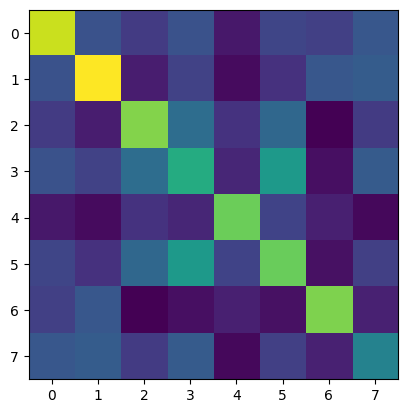

In [12]:
plt.imshow(array_of_pairwise_covariances_of_characteristics_of_patients_with_CHD)

Variables 2 and 3 are relatively highly correlated. The covariance and correlation between variables 1 and 2 is $0.20866572$. The covariance and correlation between variables $1$ and $3$ is $0.08086999$.

In [13]:
array_of_characteristics_of_patients_with_CHD = data_frame_of_characteristics_and_indicators_of_CHD_for_patients_with_CHD.drop(columns = 'chd').to_numpy()
array_of_characteristics_of_patients_with_CHD

array([[ 1.05856354,  1.82307289,  0.47841217, ..., -0.17678588,
         3.27773797,  0.62933573],
       [ 0.27708929, -0.79023744, -0.15967999, ...,  0.67137291,
        -0.61274463,  1.3831147 ],
       [ 1.54698495,  0.84226418,  0.80712631, ...,  1.41262092,
         0.29506191,  1.04048789],
       ...,
       [-0.50438497, -0.30419223, -0.92345696, ..., -0.4951424 ,
         1.24212494, -1.08379829],
       [ 2.13309064,  0.12300445, -0.15967999, ...,  0.60960224,
         0.0685192 ,  0.62933573],
       [-0.3090164 , -0.79241702,  0.0385153 , ..., -2.69512851,
        -0.69698253,  0.21818356]])

In [14]:
array_of_characteristics_of_patients_without_CHD = data_frame_of_characteristics_and_indicators_of_CHD_for_patients_without_CHD.drop(columns = 'chd').to_numpy()

In [15]:
covariance_array_of_characteristics_of_patients_with_CHD = np.cov(array_of_characteristics_of_patients_with_CHD.T)
covariance_array_of_characteristics_of_patients_with_CHD

array([[ 1.33739562,  0.20866572,  0.08086999,  0.21284303, -0.10111941,
         0.13888933,  0.10422668,  0.24776378],
       [ 0.20866572,  1.4712829 , -0.07675805,  0.12104963, -0.16253186,
         0.0275631 ,  0.24625639,  0.27936561],
       [ 0.08086999, -0.07675805,  1.15693105,  0.38830124,  0.03284373,
         0.34886272, -0.21238032,  0.08066903],
       [ 0.21284303,  0.12104963,  0.38830124,  0.82464426, -0.03387573,
         0.70009861, -0.14415505,  0.26833915],
       [-0.10111941, -0.16253186,  0.03284373, -0.03387573,  1.09169001,
         0.12446971, -0.06320885, -0.17799158],
       [ 0.13888933,  0.0275631 ,  0.34886272,  0.70009861,  0.12446971,
         1.0884506 , -0.1361151 ,  0.10558613],
       [ 0.10422668,  0.24625639, -0.21238032, -0.14415505, -0.06320885,
        -0.1361151 ,  1.14618971, -0.05760707],
       [ 0.24776378,  0.27936561,  0.08066903,  0.26833915, -0.17799158,
         0.10558613, -0.05760707,  0.53251276]])

In [16]:
covariance_array_of_characteristics_of_patients_without_CHD = np.cov(array_of_characteristics_of_patients_without_CHD.T)

In [17]:
# In R^{k x k}
precision_array_of_characteristics_of_patients_with_CHD = np.linalg.inv(covariance_array_of_characteristics_of_patients_with_CHD)
precision_array_of_characteristics_of_patients_with_CHD

array([[ 8.40789814e-01, -3.11518857e-02, -1.84769564e-02,
        -9.80374979e-02,  1.41047927e-02, -2.05427414e-02,
        -1.03515759e-01, -3.25063301e-01],
       [-3.11518857e-02,  8.01404950e-01,  6.18097212e-02,
        -3.80449041e-02,  3.70718257e-02,  6.21575997e-04,
        -1.80837114e-01, -4.03424175e-01],
       [-1.84769564e-02,  6.18097212e-02,  1.05770991e+00,
        -5.02622040e-01, -1.97065964e-02, -4.70429431e-03,
         1.23392073e-01,  7.69117912e-02],
       [-9.80374979e-02, -3.80449041e-02, -5.02622040e-01,
         3.65201858e+00,  1.53312787e-01, -2.06208146e+00,
         8.50581097e-02, -1.22926523e+00],
       [ 1.41047927e-02,  3.70718257e-02, -1.97065964e-02,
         1.53312787e-01,  1.00412237e+00, -2.31570154e-01,
         4.86579755e-02,  2.86523847e-01],
       [-2.05427414e-02,  6.21575997e-04, -4.70429431e-03,
        -2.06208146e+00, -2.31570154e-01,  2.22652705e+00,
         1.99112479e-02,  5.32328828e-01],
       [-1.03515759e-01, -1.808371

In [18]:
precision_array_of_characteristics_of_patients_without_CHD = np.linalg.inv(covariance_array_of_characteristics_of_patients_without_CHD)

We choose conjugate prior probability density distributions / functions $f\left(\vec{M}\right)$ for our likelihoods that are multivariate Gaussian probability density distributions with mean vector $\vec{\mu}_0 = [0, 0, 0, 0, 0, 0, 0, 0]^T$ and precision matrix
$$\boldsymbol{\tau}_0 = I_8 = \begin{bmatrix}
1 & 0 & 0 & 0 & 0 & 0 & 0 & 0 \\
0 & 1 & 0 & 0 & 0 & 0 & 0 & 0 \\
0 & 0 & 1 & 0 & 0 & 0 & 0 & 0 \\
0 & 0 & 0 & 1 & 0 & 0 & 0 & 0 \\
0 & 0 & 0 & 0 & 1 & 0 & 0 & 0 \\
0 & 0 & 0 & 0 & 0 & 1 & 0 & 0 \\
0 & 0 & 0 & 0 & 0 & 0 & 1 & 0 \\
1 & 0 & 0 & 0 & 0 & 0 & 0 & 1
\end{bmatrix}$$
Each prior probability density distribution is a probability density distribution on parameter $\vec{M}$ before we collect any data or do any analysis. Each cross section through our prior probability density distribution is a hypersphere.

Our posterior probability density distribution will be a multivariate Gaussian probability density distribution $f\left(\vec{M} | \vec{x}\right)$ with mean vector $\vec{\mu}^*$.

In [19]:
precision_array_for_prior_probability_density_distribution = np.eye(8)
precision_array_for_prior_probability_density_distribution

array([[1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1.]])

In [20]:
mean_array_for_prior_probability_density_distribution = np.zeros(8)
print(mean_array_for_prior_probability_density_distribution)

[0. 0. 0. 0. 0. 0. 0. 0.]


In [21]:
number_of_patients_with_CHD = data_frame_of_characteristics_and_indicators_of_CHD_for_patients_with_CHD.shape[0]
number_of_patients_without_CHD = data_frame_of_characteristics_and_indicators_of_CHD_for_patients_without_CHD.shape[0]
posterior_probability_estimate_for_mean_for_patients_with_CHD_using_data_and_prior = np.matmul(np.linalg.inv(precision_array_for_prior_probability_density_distribution + number_of_patients_with_CHD * precision_array_of_characteristics_of_patients_with_CHD), (np.ndarray.flatten(np.matmul(precision_array_for_prior_probability_density_distribution, mean_array_for_prior_probability_density_distribution)) + np.ndarray.flatten(number_of_patients_with_CHD * np.matmul(precision_array_of_characteristics_of_patients_with_CHD, mean_array_for_patients_with_CHD.T))))
posterior_probability_estimate_for_mean_for_patients_with_CHD_using_data_and_prior
# mean_array_for_patients_with_CHD uses just data

array([0.26005479, 0.40670339, 0.35757697, 0.34449983, 0.14182737,
       0.13365153, 0.08563775, 0.50894998])

In [22]:
np.linalg.norm(posterior_probability_estimate_for_mean_for_patients_with_CHD_using_data_and_prior)

0.885392119876573

In [23]:
mean_array_for_patients_with_CHD

array([[0.26426823, 0.41177089, 0.36139839, 0.34912802, 0.14172199,
        0.13751694, 0.0859086 , 0.51241433]])

In [24]:
np.linalg.norm(mean_array_for_patients_with_CHD)

0.8948949069289732

The posterior probability estimate $\vec{\mu}^* = [0.260, 0.407, 0.358, 0.344, 0.142, 0.134, 0.086, 0.509]$ for the mean vector for patients with CHD using data and prior is shifted in $8$-dimensional space toward the mean vector $\vec{\mu}_0 = [0, 0, 0, 0, 0, 0, 0, 0]$ of the prior probability distribution from the mean vector $\vec{M} = [0.264, 0.412, 0.361, 0.349, 0.142, 0.138, 0.086, 0.512]$ of the likelihood distribution for patients with CHD.

In [25]:
posterior_probability_estimate_for_mean_for_patients_without_CHD_using_data_and_prior = np.matmul(np.linalg.inv(precision_array_for_prior_probability_density_distribution + number_of_patients_without_CHD * precision_array_of_characteristics_of_patients_without_CHD), (np.ndarray.flatten(np.matmul(precision_array_for_prior_probability_density_distribution, mean_array_for_prior_probability_density_distribution)) + np.ndarray.flatten(number_of_patients_without_CHD * np.matmul(precision_array_of_characteristics_of_patients_without_CHD, mean_array_for_patients_without_CHD.T))))
posterior_probability_estimate_for_mean_for_patients_without_CHD_using_data_and_prior

array([-0.13888394, -0.21700396, -0.19022843, -0.18300569, -0.07500658,
       -0.07149416, -0.04486963, -0.26945986])

In [26]:
mean_array_for_patients_without_CHD

array([[-0.14000966, -0.21815676, -0.19146935, -0.18496849, -0.0750845 ,
        -0.07285666, -0.04551449, -0.27147779]])

The posterior probability estimate $\vec{\mu}^* = [-0.139, -0.217, -0.190, -0.183, -0.075, -0.071, -0.045, -0.269]$ for the mean vector for patients without CHD using data and prior is shifted in $8$-dimensional space toward the mean vector $\vec{\mu}_0 = [0, 0, 0, 0, 0, 0, 0, 0]$ of the prior probability distribution from the mean vector $\vec{M} = [-0.140, -0.218, -0.191, -0.185, -0.075, -0.073, -0.046, -0.271]$ of the likelihood distribution for patients without CHD.

According to https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.multivariate_normal.html ,
$$\boldsymbol{V} = \left(\boldsymbol{\tau}_0 + N \boldsymbol{\tau}\right)^{-1}$$
$$f\left(\vec{\mu} | \boldsymbol{x}\right) = \frac{1}{\sqrt{\left(2 \pi\right)^{rank\left(\boldsymbol{V}\right)} det\left(\boldsymbol{V}\right)}} exp\left[-\frac{1}{2} \left(\vec{\mu} - \vec{\mu}^*\right)^T \boldsymbol{V}^{-1} \left(\vec{\mu} - \vec{\mu}^*\right)\right]$$

where $\vec{\mu}$ is an unknown population mean vector, $\boldsymbol{x}$ is a matrix of predictor values, $\bar{\boldsymbol{x}}$ is the mean across columns of $\boldsymbol{x}$, $\boldsymbol{\tau}_0$ is the precision matrix for a prior probability density distribution, $N$ is number of observations, $\boldsymbol{\tau}$ is the precision matrix (inverse of variance-covariance matrix) for data matrix / data frame $\boldsymbol{x}$, and $\vec{\mu}^* = \left(\boldsymbol{\tau}_0 + N \boldsymbol{\tau}\right)^{-1}\left(\boldsymbol{\tau}_0 \boldsymbol{\mu}_0 + N \boldsymbol{\tau} \bar{\boldsymbol{x}}\right)$ is the posterior probability estimate for mean using data and prior. For patients with CHD, $\boldsymbol{x}$, $\bar{\boldsymbol{x}}$ $N$, $\boldsymbol{\tau}$, $\boldsymbol{V}$, and $\vec{\mu}^*$ take on the subscript "with CHD".

Per https://stats.stackexchange.com/questions/331283/how-to-calculate-the-probability-of-a-data-point-belonging-to-a-multivariate-nor , if I have parameters $\vec{\mu^*}_{CHD}$ and $\boldsymbol{V}_{CHD}$ and posterior mean of patients without CHD $\vec{\mu^*}_{!CHD}$, then a point $\vec{\mu}$ that is less likely than $\vec{\mu}_{!CHD}$ has less density and higher Mahalanobis distance and satisfies
$$\frac{1}{\sqrt{\left(2 \pi\right)^{rank\left(\boldsymbol{V}_{CHD}\right)} det\left(\boldsymbol{V}_{CHD}\right)}} exp\left[-\frac{1}{2} \left(\vec{\mu} - {\vec{\mu}^*}_{CHD}\right)^T {\boldsymbol{V}_{CHD}}^{-1} \left(\vec{\mu} - {\vec{\mu}^*}_{CHD}\right)\right] \leq \frac{1}{\sqrt{\left(2 \pi\right)^{rank\left(\boldsymbol{V}_{CHD}\right)} det\left(\boldsymbol{V}_{CHD}\right)}} exp\left[-\frac{1}{2} \left({\vec{\mu}^*}_{!CHD} - {\vec{\mu}^*}_{CHD}\right)^T {\boldsymbol{V}_{CHD}}^{-1} \left({\vec{\mu}^*}_{!CHD} - {\vec{\mu}^*}_{CHD}\right)\right]$$
$$exp\left[-\frac{1}{2} \left(\vec{\mu} - {\vec{\mu}^*}_{CHD}\right)^T {\boldsymbol{V}_{CHD}}^{-1} \left(\vec{\mu} - {\vec{\mu}^*}_{CHD}\right)\right] \leq exp\left[-\frac{1}{2} \left({\vec{\mu}^*}_{!CHD} - {\vec{\mu}^*}_{CHD}\right)^T {\boldsymbol{V}_{CHD}}^{-1} \left({\vec{\mu}^*}_{!CHD} - {\vec{\mu}^*}_{CHD}\right)\right]$$
$$-\frac{1}{2} \left(\vec{\mu} - {\vec{\mu}^*}_{CHD}\right)^T {\boldsymbol{V}_{CHD}}^{-1} \left(\vec{\mu} - {\vec{\mu}^*}_{CHD}\right) \leq -\frac{1}{2} \left({\vec{\mu}^*}_{!CHD} - {\vec{\mu}^*}_{CHD}\right)^T {\boldsymbol{V}_{CHD}}^{-1} \left({\vec{\mu}^*}_{!CHD} - {\vec{\mu}^*}_{CHD}\right)$$
$$\left(\vec{\mu} - {\vec{\mu}^*}_{CHD}\right)^T {\boldsymbol{V}_{CHD}}^{-1} \left(\vec{\mu} - {\vec{\mu}^*}_{CHD}\right) \geq \left({\vec{\mu}^*}_{!CHD} - {\vec{\mu}^*}_{CHD}\right)^T {\boldsymbol{V}_{CHD}}^{-1} \left({\vec{\mu}^*}_{!CHD} - {\vec{\mu}^*}_{CHD}\right)$$
$$D_{\vec{\mu}} \geq D_{{\vec{\mu}^*}_{CHD}}$$

$$P\left(D_{\vec{\mu}} \geq D_{{\vec{\mu}^*}_{!CHD}}\right) \\
= 1 - P\left(D_{\vec{\mu}} \leq D_{{\vec{\mu}^*}_{!CHD}}\right)$$

$$D_{\vec{\mu}} \sim \chi^2(number \ of \ predictors)$$

In [46]:
V = np.linalg.inv(precision_array_for_prior_probability_density_distribution + number_of_patients_with_CHD * precision_array_of_characteristics_of_patients_with_CHD)
Mahalanobis_distance = np.matmul((mean_array_for_patients_without_CHD - posterior_probability_estimate_for_mean_for_patients_with_CHD_using_data_and_prior), np.linalg.inv(V))
Mahalanobis_distance = np.matmul(Mahalanobis_distance, (mean_array_for_patients_without_CHD - posterior_probability_estimate_for_mean_for_patients_with_CHD_using_data_and_prior).T)
print(Mahalanobis_distance)
number_of_predictors = data_frame_of_patient_characteristics_and_indicators_of_CHD.shape[1] - 1
import scipy
1 - scipy.stats.chi2.cdf(Mahalanobis_distance, number_of_predictors)

[[269.63582653]]


array([[0.]])

The probability that a point $\vec{\mu}$ is more extreme than ${\vec{\mu}^*}_{!CHD}$ given posterior probability density distribution with parameters $\vec{\mu^*}_{CHD}$ and $\boldsymbol{V}_{CHD}$
$$P\left(D_{\vec{\mu}} \geq D_{{\vec{\mu}^*}_{!CHD}}\right) = 0$$

In [47]:
V = np.linalg.inv(precision_array_for_prior_probability_density_distribution + number_of_patients_without_CHD * precision_array_of_characteristics_of_patients_without_CHD)
Mahalanobis_distance = np.matmul((mean_array_for_patients_with_CHD - posterior_probability_estimate_for_mean_for_patients_without_CHD_using_data_and_prior), np.linalg.inv(V))
Mahalanobis_distance = np.matmul(Mahalanobis_distance, (mean_array_for_patients_with_CHD - posterior_probability_estimate_for_mean_for_patients_without_CHD_using_data_and_prior).T)
print(Mahalanobis_distance)
number_of_predictors = data_frame_of_patient_characteristics_and_indicators_of_CHD.shape[1] - 1
import scipy
1 - scipy.stats.chi2.cdf(Mahalanobis_distance, number_of_predictors)

[[333.59179412]]


array([[0.]])

The probability that a point $\vec{\mu}$ is more extreme than ${\vec{\mu}^*}_{CHD}$ given posterior probability density distribution with parameters $\vec{\mu^*}_{!CHD}$ and $\boldsymbol{V}_{!CHD}$
$$P\left(D_{\vec{\mu}} \geq D_{{\vec{\mu}^*}_{CHD}}\right) = 0$$